<center><h2><b><span style="color:orange"> 
Emotion Detection from Text (3%)<br>
By: Zubeka Dane Dang <br>
</span><b></h2>

<h3><b><span style="color:lightblue">
 Part 1- Programming
 </span><b></h3>
 Download the dataset “Tweet Emotion Dataset.xlsx”. This corpus is provided for four emotions: joy, sadness, fear, and anger. 
 The test data “test_dataset.xlsx” includes only the tweet text.

<p><b> <span style="color: orange"> Step 1: Install and import relevant libraries</b></p>

In [42]:
#This bit of code allows me to output more than one variable value without using a print statement.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [43]:
# Install and import relevant libraries
import warnings
warnings.filterwarnings("ignore") # avoid showing warning, comment out instead.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns
import re
import os, types

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpdca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dpdca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpdca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<p><b> <span style="color: orange"> Step 2: Load the data and convert data to DataFrame</b></p>

In [103]:
df = pd.read_excel('Tweet Emotion Dataset.xlsx', header=None, names=['TweetText', "Emotion"])
df.head()
df.info()

,TweetText,Emotion
0,@ZubairSabirPTI pls dont insult the word 'Molna',anger
1,@ArcticFantasy I would have almost took offens...,anger
2,@IllinoisLoyalty that Rutgers game was an abom...,anger
3,@CozanGaming that's what lisa asked before she...,anger
4,Sometimes I get mad over something so minuscul...,anger


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetText  347 non-null    object
 1   Emotion    347 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


<p><b> <span style="color: orange"> Step 3: Clean the data</b></p>

In [104]:
# Check for duplicates
df[df['TweetText'].duplicated() == True]

# Drop duplicated values
dup_index = df[df['TweetText'].duplicated() == True].index
dup_index
df.drop(dup_index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)



,TweetText,Emotion
273,@1johndes ball watching &amp; Rojo'd header wa...,sadness
281,"@ccrago It was dreadful, even after he met the...",sadness
289,"[ @HedgehogDylan ] *she would frown a bit, fol...",sadness
296,"@DxfyingGrxvity - frustration, looking up at E...",sadness
345,"Just watched Django Unchained, Other people ma...",sadness


Index([273, 281, 289, 296, 345], dtype='int64')

In [105]:
# Shape of data after dropping duplicates
df.shape

(342, 2)

In [106]:
# Clean text function:
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n", "", text)   # remove line breaks
    text = text.lower()  # convert to lowercase
    text = re.sub(r'http[s]?://\S+', '', text)   # remove hyperlinks
    text = re.sub(r"\d+", "", text)   # remove digits (numbers)
    text = re.sub(r'[\$\d+\d+\$]', "", text)  # remove currencies 
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   # remove dates 
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]', r' ', text)   # remove non-ascii
    text = re.sub(r'[^\w\s]', '', text)   # remove punctuation
    # text = re.sub(r'(.)\1+', r'\1', text)  
    text = re.sub(r'(\w)(\1{2,})', r'\1', text) # Replace words with multiple consecutive letters with the standard form
    text = re.sub(r"(\w)([A-Z])", r"\1 \2", text)  # Insert a space before all capital letters in the middle of a sentence

    # remove stop words
    if rm_stop:
        filtered_tokens = [word for word in word_tokenize(text) if word.lower() not in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    # lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        text = " ".join(lemm_tokens)

    # stemming
    elif method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        text = " ".join(stem_tokens)

    # remove words with length shorter than 4 characters
    text = ' '.join(word for word in text.split() if len(word) >= 4)

    return text

In [107]:
# Clean data
df['CleanedText'] = df['TweetText'].apply(lambda x: text_clean(x, method='L', rm_stop=True))

In [108]:
df['CleanedText'] .sample(7)

301    little extra money would blow whole paycheck k...
327    yesterday finished watching penny dreadful bea...
316    barcabhoy course didnt sink stud knee like for...
148    upping room make apprehend leaving charcoal ow...
107    apocalypse nothing thought would benneveryone ...
88     reallyjumanji rock jack black kevin hartare ki...
72                        seeing alex revells face angry
Name: CleanedText, dtype: object

In [109]:
df[['Emotion', 'CleanedText']].sample(10)

,Emotion,CleanedText
128,fear,theyll friend shake hand kick door thas game
108,fear,want service frontier terrible service atampt ...
96,fear,fatgirlhealthy mbscbill violence intimidation ...
270,joy,gigafag pipertownsend_ snapchat would differ o...
196,joy,nawaz sharif getting funnier kapilsharmak chal...
241,joy,communism_kills subway melt make sure hearty i...
225,joy,greet raised hgatchristmas come sparkling cllr...
247,joy,dolores thin lipped smile graced glossed blue ...
289,sadness,might radiox tomorrow hopefully current stink ...
301,sadness,little extra money would blow whole paycheck k...


<p><b> <span style="color: orange"> Step 4: Split data to Training and Test set</b></p>

In [112]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

<p><b> <span style="color: orange"> Step 5: Build a Classifier Model</b></p>
Hybrid approaches: adopts a mixture of rule-based and ML approaches.

In [111]:
# Rule-based approach for four emotions
joy_keywords = ['happy', 'joy', 'excited', 'delight', 'good', 'enjoy','rejoice', 'cheer', 'amuse', 'bliss', 'charm', 'humor', 'pride','satisfy','smile','smiling','laugh','delight',
                'hilarious','optimism','love']
sadness_keywords = ['sad', 'unhappy', 'tear', 'heartbroken','depressing','unfortunate','awful','sorrow', 'upset', 'sorry','pathetic' ,'traumatic', 'cheerless', 'miserable', 'hurt','cry',]
fear_keywords = ['fear', 'scare', 'anxious', 'terrified', 'afraid','panic','horror','distress','worry','nerves',
                 'unease','fright','terror', 'anxiety', 'nightmare', 'shock', 'nervous', 'awe', 'terror']
anger_keywords = ['angry', 'irate', 'mad', 'outraged', 'insult', 'offense', 'abom', 'inconsodable', 'annoy', 
                  'irritate', 'displease','provoke','irritate','destroy','ruin','raging','anger', 'fuming','scowl', 'frustration']

# Function to apply rule-based approach
def rule_based_predict(text):
    if any(keyword in text for keyword in joy_keywords):
        return 'joy'
    elif any(keyword in text for keyword in sadness_keywords):
        return 'sadness'
    elif any(keyword in text for keyword in fear_keywords):
        return 'fear'
    elif any(keyword in text for keyword in anger_keywords):
        return 'anger'
    else:
        return 'other'


In [113]:
from sklearn.naive_bayes import MultinomialNB

#vectorize dataset
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(train_df['CleanedText'])
y_train = train_df['Emotion']

#Train Naive Bayes model
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vec, y_train)

# Apply rule-based approach and Naive Bayes model
test_df['RuleBasedPrediction'] = test_df['CleanedText'].apply(rule_based_predict)
X_test_vec = tfidf.transform(test_df['CleanedText'])
test_df['MLPrediction'] = model.predict(X_test_vec)

# Combine predictions
def combine_predictions(rule_based, ml_based):
    # Use rule-based prediction if available, otherwise use ML-based prediction
    return rule_based if rule_based != 'other' else ml_based

test_df['CombinedPrediction'] = test_df.apply(lambda row: combine_predictions(row['RuleBasedPrediction'], row['MLPrediction']), axis=1)

MultinomialNB(alpha=0.1)

In [115]:
test_df.sample(30)

,TweetText,Emotion,CleanedText,RuleBasedPrediction,MLPrediction,CombinedPrediction
286,@OHSOVICTORIOUS_ @FaZeAdapt We all seen it com...,sadness,ohsovictorious_ fazeadapt seen coming instagra...,other,joy,joy
118,@AlaskaGurus @adventuretweets agreed! üòç an ...,fear,alaskagurus adventuretweets agreed meet beauti...,other,fear,fear
42,"Kik to trade, have fun or a conversation (kik...",anger,trade conversation youraffair kikme messageme ...,other,anger,anger
145,Rooney shocking attempted cross,fear,rooney shocking attempted cross,fear,fear,fear
116,"@spencer0415 awe, I love you kid!!",fear,spencer love,joy,joy,joy
113,@soozclifford Sure have... Sydney are too toug...,fear,soozclifford sure sydney tough quick team pres...,other,fear,fear
109,@TheDappaMc also ¬£2.50 for a chocolate Feast ...,fear,thedappamc also chocolate feast lolly proper s...,fear,fear,fear
39,@LeonWobYP b***er off. NCFC is a grudge match :),anger,leonwobyp ncfc grudge match,other,fear,fear
78,"@TrevorHMoore @paget_old In Scotland, the righ...",anger,trevorhmoore paget_old scotland rightwingers r...,other,fear,fear
147,Another fun fact: i am afraid,fear,another fact afraid,fear,fear,fear


<p><b> <span style="color: orange"> Step 6: Evaluate Model</b></p>

In [114]:
from sklearn.metrics import accuracy_score

# Evaluate combined predictions
accuracy_combined = accuracy_score(test_df['Emotion'], test_df['CombinedPrediction'])
print(f'Accuracy of combined approach: {accuracy_combined:.2f}')

Accuracy of combined approach: 0.70


array([[13,  2,  3,  2],
       [ 1, 17,  5,  0],
       [ 0,  2, 13,  0],
       [ 1,  0,  5,  5]], dtype=int64)

              precision    recall  f1-score   support

       anger       0.87      0.65      0.74        20
        fear       0.81      0.74      0.77        23
         joy       0.50      0.87      0.63        15
     sadness       0.71      0.45      0.56        11

    accuracy                           0.70        69
   macro avg       0.72      0.68      0.68        69
weighted avg       0.74      0.70      0.70        69



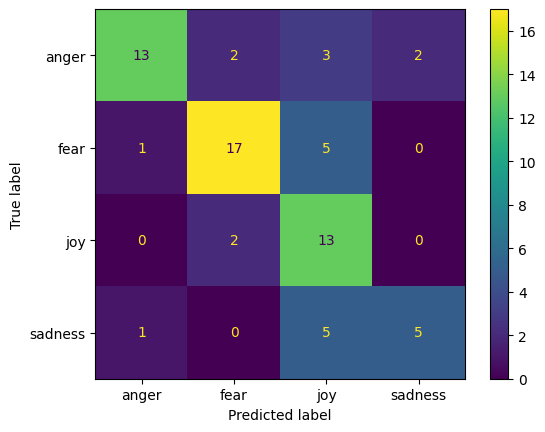

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate model using confusion matrix
confusion_matrix(test_df['Emotion'], test_df['CombinedPrediction'])
ConfusionMatrixDisplay.from_predictions(test_df['Emotion'], test_df['CombinedPrediction'])
print(classification_report(test_df['Emotion'], test_df['CombinedPrediction']))

Precision is defined as the proportion of positive predictions to the number of observations that are actually positive.
Recall tells us what is the proportion of actually positive observations predicted as positive.
F1-score combines precision and recall to measure the test accuracy.
For each class:

(1) Anger:
* True Positives (TP): 13
* False Negatives (FN): 2 + 3 + 2 = 7 (Misclassified as sadness, fear, and joy)
* False Positives (FP): 1 + 0 + 1 = 2 (Misclassified as fear and sadness)
* Precision: 0.87 (87% of predicted 'anger' emotion were correct)
* Recall: 0.65 (65% of actual 'anger' emotion were predicted correctly)
* F1-score: 0.74 (a balance between precision and recall)

(2) Fear:
* True Positives (TP): 17
* False Negatives (FN):  1 + 5 + 0 = 6 (Misclassified as anger, joy)
* False Positives (FP): 2 + 2 = 4 (Misclassified as anger, joy)
* Precision: 0.81 (81% of predicted 'fear' emotion were correct)
* Recall: 0.74 (74% of actual 'fear' emotion were predicted correctly)
* F1-score: 0.77 (a balance between precision and recall)

(3) Joy:
* True Positives (TP): 13
* False Negatives (FN): 0 + 5 + 0 = 5 (Misclassified as anger, fear)
* False Positives (FP): 3 + 0 + 5 = 8 (Misclassified as anger, sadness)
* Precision: 0.50 (50% of predicted 'joy' emotion were correct)
* Recall: 0.87 (74% of actual 'joy' emotion were predicted correctly)
* F1-score: 0.63 (a balance between precision and recall)

(4) 'Sadness':
* True Positives (TP): 13
* False Negatives (FN): 0 + 5 + 0 = 5 (Misclassified as anger, fear)
* False Positives (FP): 3 + 0 + 5 = 8 (Misclassified as anger, sadness)
* Precision: 0.71 (71% of predicted 'sad' emotion were correct)
* Recall: 0.45 (45% of actual 'sad' emotion were predicted correctly)
* F1-score: 0.56 (a balance between precision and recall)

* The model performs well for the "fear" and "joy" classes, with high precision and recall.
* The model struggles more with "anger," especially in terms of recall.
* The "sadness" class has a reasonable precision but lower recall.

==> Overall, the accuracy of this model is 70%. This is a not too bad prediction result.

<Figure size 800x800 with 0 Axes>

Text(0.5, 0, 'False Positive Rate (FPR)')

Text(0, 0.5, 'True Positive Rate (TPR)')

Text(0.5, 1.0, '(ROC) Curve for Emotion Classifier Model')

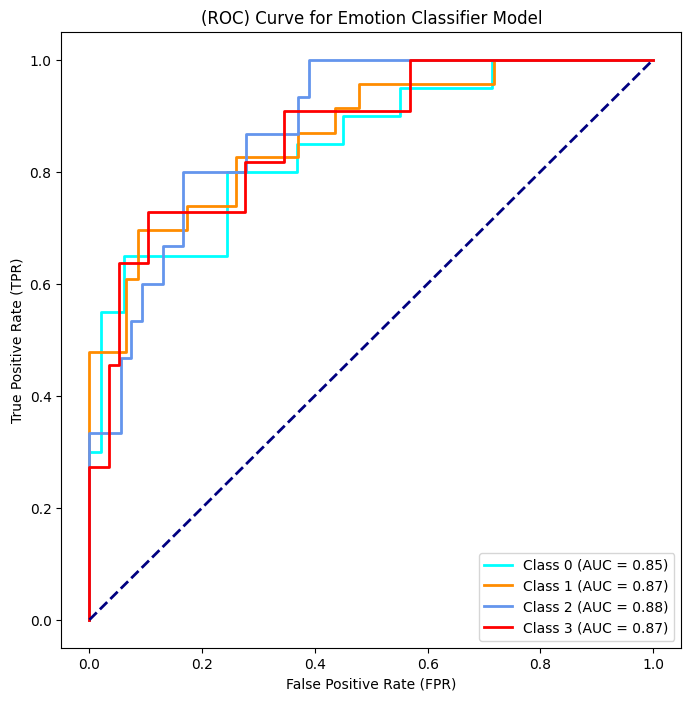

In [129]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
# Predict probabilities on the test set
y_prob = model.predict_proba(X_test_vec)

# Binarize the output
y_test_bin = label_binarize(test_df['Emotion'], classes=np.unique(test_df['Emotion']))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red']) 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('(ROC) Curve for Emotion Classifier Model')
plt.legend(loc='lower right')
plt.show()

The True Positive Rate of all 4 emotion classes is quite high. This is an optimist result.

## Error Rate Plot

Text(0.5, 0, 'Number of Nodes')

Text(0, 0.5, 'Error Rate (%)')

(-1.0, 50.0)

Text(0.5, 1.0, 'Comparison of Error Rates on Training and Test Sets')

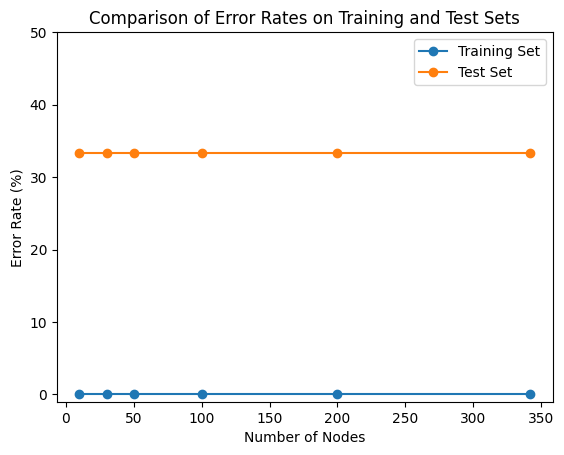

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Get predictions for training set and test set
train_predictions = model.predict(X_train_vec)
test_predictions = model.predict(X_test_vec)

# Calculate error rates
train_error_rate = (1 - accuracy_score(train_df['Emotion'], train_predictions)) *100
test_error_rate = (1 - accuracy_score(test_df['Emotion'], test_predictions)) *100

# Plotting
nodes = [10, 30, 50, 100, 200, 342]  
plt.plot(nodes, [train_error_rate] * len(nodes), label='Training Set', marker='o')
plt.plot(nodes, [test_error_rate] * len(nodes), label='Test Set', marker='o')

plt.xlabel('Number of Nodes')
plt.ylabel('Error Rate (%)')
plt.ylim(-1, 50) 
plt.title('Comparison of Error Rates on Training and Test Sets')
plt.legend()
plt.show()


The model is a overfitting. In my opinion, the number of data sample is little. If we can collect more data sample, the overfitting problem may improve

<p><b> <span style="color: orange"> Step 6: Predict unlabeled dataset</b></p>

In [131]:
# Read excel file
testing_data = pd.read_excel('test_dataset.xlsx', header=None, names=['TweetText', 'Emotion'])
testing_data.head()

,TweetText,Emotion
0,At the point today where if someone says somet...,?
1,@CorningFootball IT'S GAME DAY!!!! T MIN...,?
2,This game has pissed me off more than any othe...,?
3,@spamvicious I've just found out it's Candice ...,?
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,?


In [132]:
# Apply rule-based approach and Naive Bayes model to the unlabeled dataset
testing_data['RuleBasedPrediction'] = testing_data['TweetText'].apply(rule_based_predict)
X_testing_data_vec = tfidf.transform(testing_data['TweetText'])
testing_data['MLPrediction'] = model.predict(X_testing_data_vec)

# Combine predictions for the unlabeled dataset
testing_data['CombinedPrediction'] = testing_data.apply(lambda row: combine_predictions(row['RuleBasedPrediction'], row['MLPrediction']), axis=1)

# Display the resulting DataFrame with combined predictions
print(testing_data[['TweetText', 'CombinedPrediction']])

# Save the results to a new Excel file
testing_data[['TweetText', 'CombinedPrediction']].to_excel('test_dataset_result.xlsx', index=False)

                                              TweetText CombinedPrediction
0     At the point today where if someone says somet...            sadness
1     @CorningFootball  IT'S GAME DAY!!!!      T MIN...              anger
2     This game has pissed me off more than any othe...              anger
3     @spamvicious I've just found out it's Candice ...              anger
4     @moocowward @mrsajhargreaves @Melly77 @GaryBar...                joy
...                                                 ...                ...
3137    Why does Candice constantly pout #GBBO üíÑüòí               fear
3138  @redBus_in #unhappy with #redbus CC, when I ta...                joy
3139  @AceOperative789 no pull him afew weeks ago, s...            sadness
3140  I'm buying art supplies and I'm debating how s...            sadness
3141  @sainsburys Could you ask your Chafford Hundre...                joy

[3142 rows x 2 columns]


In [133]:
testing_data.sample(10)

,TweetText,Emotion,RuleBasedPrediction,MLPrediction,CombinedPrediction
282,"@alliex both, scrap *ll the rage instead",?,other,anger,anger
1559,@darcomafloy OMG IM CRYING HAHAHAHA ikaw talag...,?,other,anger,anger
1324,@Rovers what highlights ? I would imagine you ...,?,other,sadness,sadness
2433,I'll find Myself smiling and even laughing at ...,?,joy,joy,joy
2811,My encouragement today is my dog while my head...,?,other,sadness,sadness
2721,@HonestAndFrank but @BillCosby drugged and ra...,?,other,sadness,sadness
1627,#soywax limited edition horror candles going u...,?,fear,fear,fear
310,All the young people are so bitter about how t...,?,other,anger,anger
179,@daynutrition @sliqnicq @nytimes I don't liste...,?,anger,anger,anger
1975,Nothing lovelier than your great mate sending ...,?,joy,joy,joy
